In [1]:
# Import the required libraries & modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
import os
os.chdir("C:\\Users\\sriva\\Downloads\\TMC")

In [3]:
gbc_patients = pd.read_excel("sem2_working_gbc.xlsx")

In [4]:
gbc_patients.head()

,Thyroidism,Diabetes,HTN,Family_cancer_history,ECOG_final,Gall_stone_final,Pathology,Tumour_grade_final,Cancer_presentation_final,Tumour_stage_final,...,BMI_DETAILS,BILIRUBIN CONJUGATED,BILIRUBIN UNCONJUGATED,BILIRUBIN TOTAL,AST - SGOT,ALT - SGPT,ALK PHOS [ALP],GAMMA GT,ALBUMIN,Diabetes_final
0,No,No,Yes,No,1,Yes,Adenocarcinoma,Grade 3,Incidental,Stage IV,...,24.93,0.0,0.5,0.5,23.0,28.0,147.0,21.0,4.7,Yes
1,No,No,No,No,1,Not known,Adenocarcinoma,Grade X,Metastatic,Stage IV,...,22.55,0.0,1.1,0.4,348.0,78.0,206.0,481.0,3.2,No
2,No,No,Yes,No,2,Yes,Adenocarcinoma,Grade X,Metastatic,Stage IV,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,No,Yes,Yes,Not known,1,Yes,Others,Grade 2,Incidental,Stage II,...,20.22,0.0,1.0,1.0,36.0,31.0,108.0,21.0,4.6,Yes
4,Hypothyroidism,Not known,Yes,Not known,Not known,Yes,Adenocarcinoma,Grade X,Locally advanced,Not known,...,24.15,12.1,2.0,20.5,286.0,130.0,492.0,209.0,2.6,Not known


In [5]:
gbc_patients.shape

(485, 26)

In [6]:
gbc_patients["Status"].value_counts()

Dead     425
Alive     34
Live      26
Name: Status, dtype: int64

In [7]:
##MISSING VALUES
gbc_patients.isnull().sum()

Thyroidism                    20
Diabetes                      18
HTN                           18
Family_cancer_history         20
ECOG_final                    17
Gall_stone_final              20
Pathology                      0
Tumour_grade_final            25
Cancer_presentation_final     32
Tumour_stage_final            46
Mets_site_final                0
Surgery_final                 18
Treatment_final               34
Status                         0
AGE                            0
GENDER                         0
BMI_DETAILS                   88
BILIRUBIN CONJUGATED         182
BILIRUBIN UNCONJUGATED       182
BILIRUBIN TOTAL              182
AST - SGOT                   182
ALT - SGPT                   183
ALK PHOS [ALP]               182
GAMMA GT                     183
ALBUMIN                      183
Diabetes_final                18
dtype: int64

In [8]:
import pandas as pd
from tabulate import tabulate

# Assuming you have already defined gbc_patients DataFrame and imported tabulate

# Filter columns with object data type
categorical_columns = gbc_patients.select_dtypes(include=['object']).columns

# Calculate counts of each category in categorical features
category_counts = {}

for column in categorical_columns:
    counts = gbc_patients[column].value_counts()
    category_counts[column] = counts

# Beautify and print the counts of each category in categorical features
for column, counts in category_counts.items():
    print(f'Counts for {column}:')
    print(tabulate(counts.reset_index(), headers=[column, 'Count'], tablefmt='grid'))
    print()


Counts for Thyroidism:
+----+----------------+---------+
|    | Thyroidism     |   Count |
+====+================+=========+
|  0 | No             |     347 |
+----+----------------+---------+
|  1 | Not known      |      73 |
+----+----------------+---------+
|  2 | Hypothyroidism |      45 |
+----+----------------+---------+

Counts for Diabetes:
+----+------------+---------+
|    | Diabetes   |   Count |
+====+============+=========+
|  0 | No         |     274 |
+----+------------+---------+
|  1 | Yes        |     121 |
+----+------------+---------+
|  2 | Not known  |      72 |
+----+------------+---------+

Counts for HTN:
+----+-----------+---------+
|    | HTN       |   Count |
+====+===========+=========+
|  0 | No        |     228 |
+----+-----------+---------+
|  1 | Yes       |     173 |
+----+-----------+---------+
|  2 | Not known |      66 |
+----+-----------+---------+

Counts for Family_cancer_history:
+----+-------------------------+---------+
|    | Family_cancer_hi

In [9]:
## Handling Continuous Variables

In [10]:
gbc_patients.isnull().sum()

Thyroidism                    20
Diabetes                      18
HTN                           18
Family_cancer_history         20
ECOG_final                    17
Gall_stone_final              20
Pathology                      0
Tumour_grade_final            25
Cancer_presentation_final     32
Tumour_stage_final            46
Mets_site_final                0
Surgery_final                 18
Treatment_final               34
Status                         0
AGE                            0
GENDER                         0
BMI_DETAILS                   88
BILIRUBIN CONJUGATED         182
BILIRUBIN UNCONJUGATED       182
BILIRUBIN TOTAL              182
AST - SGOT                   182
ALT - SGPT                   183
ALK PHOS [ALP]               182
GAMMA GT                     183
ALBUMIN                      183
Diabetes_final                18
dtype: int64

In [11]:
## 'AGE', 'BMI_DETAILS', 'BILIRUBIN CONJUGATED', 'BILIRUBIN UNCONJUGATED', 'BILIRUBIN TOTAL', 'AST - SGOT', 'ALT - SGPT','ALK PHOS [ALP]', 'GAMMA GT','ALBUMIN'

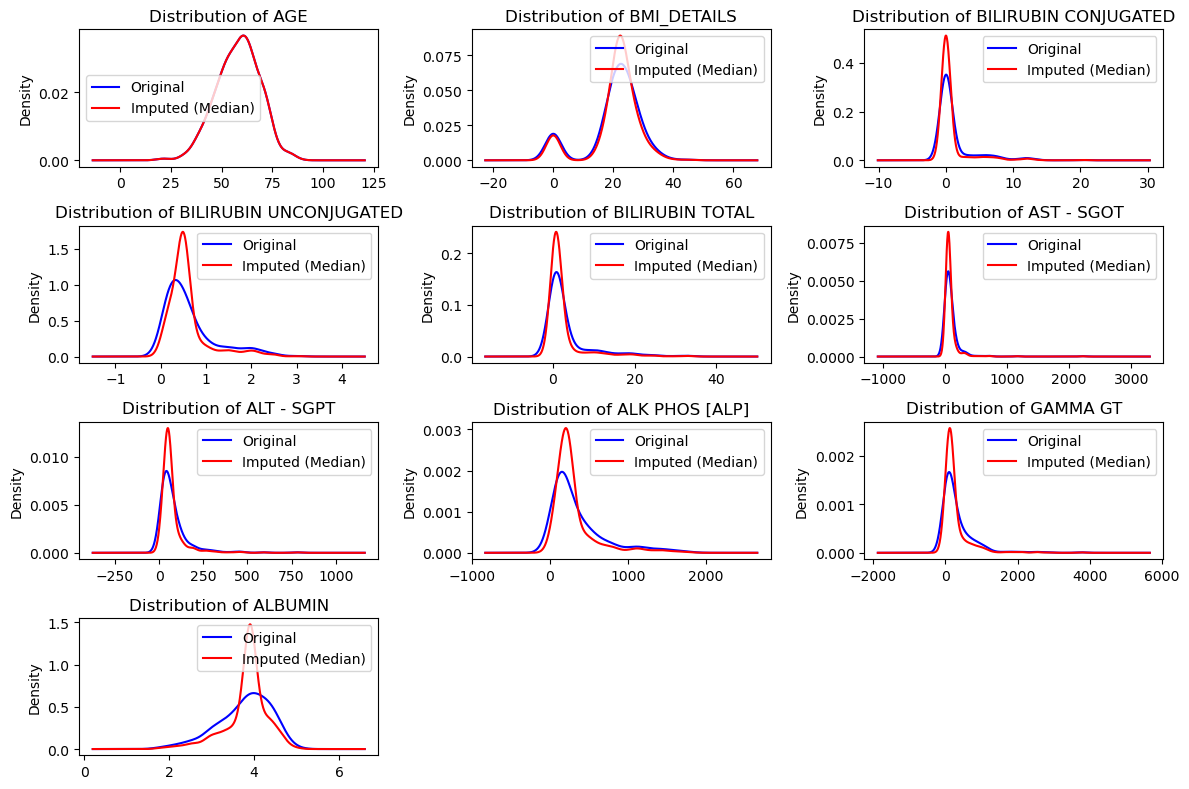

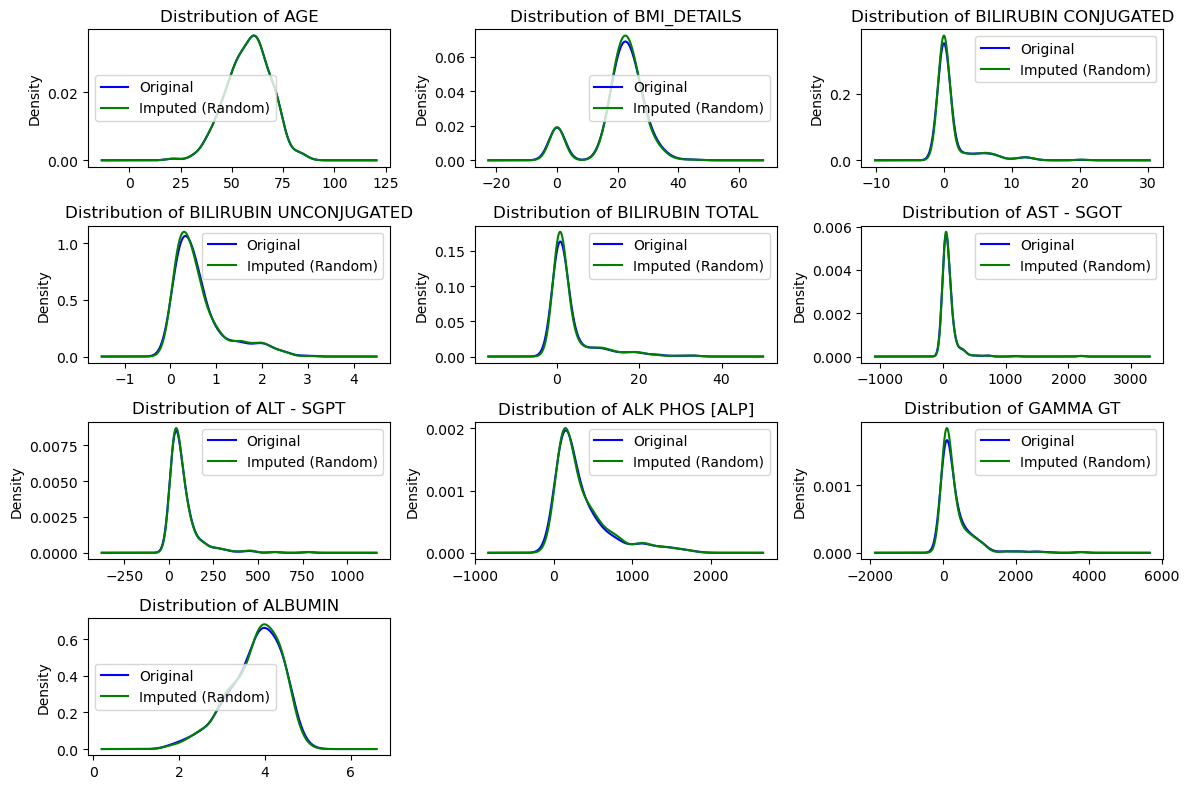

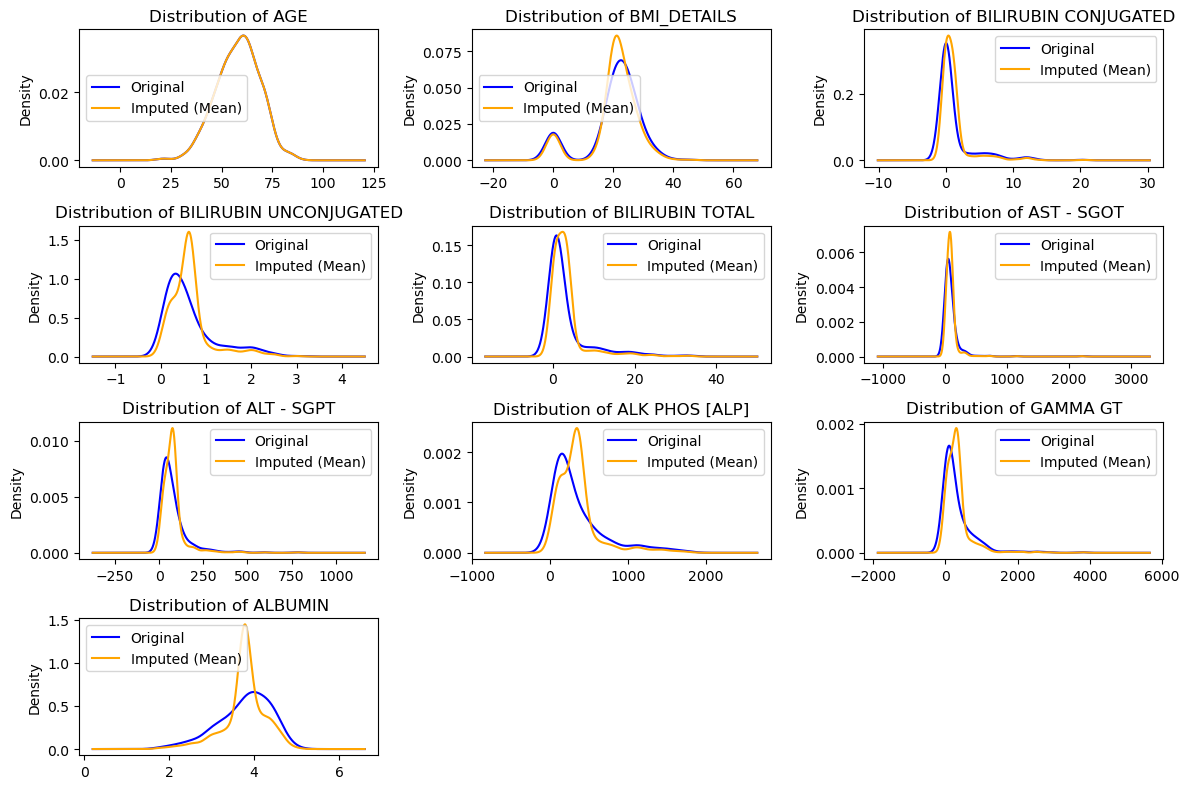

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def impute_numerical(gbc_patients, variables, method='median', random_state=None):
    imputed_values = {}  # To store the imputed values for each variable
    
    num_variables = len(variables)
    num_rows = (num_variables + 2) // 3  # Calculate the number of subplot rows
    
    plt.figure(figsize=(12, 8))
    for i, variable in enumerate(variables, 1):
        plt.subplot(num_rows, 3, i)  # Adjust subplot creation
        gbc_patients[variable].plot(kind='kde', label='Original', color='blue')
        
        if method == 'median':
            median = gbc_patients[variable].median()
            gbc_patients[variable + "_median"] = gbc_patients[variable].fillna(median)
            gbc_patients[variable + "_median"].plot(kind='kde', label='Imputed (Median)', color='red')
            imputed_values[variable] = median
        elif method == 'random':
            gbc_patients[variable + "_random"] = gbc_patients[variable]
            random_sample = gbc_patients[variable].dropna().sample(gbc_patients[variable].isnull().sum(), random_state=random_state)
            random_sample.index = gbc_patients[gbc_patients[variable].isnull()].index
            gbc_patients.loc[gbc_patients[variable].isnull(), variable + '_random'] = random_sample.values
            imputed_values[variable] = random_sample.values
            gbc_patients[variable + "_random"].plot(kind='kde', label='Imputed (Random)', color='green')
        elif method == 'mean':
            mean = gbc_patients[variable].mean()
            gbc_patients[variable + "_mean"] = gbc_patients[variable].fillna(mean)
            gbc_patients[variable + "_mean"].plot(kind='kde', label='Imputed (Mean)', color='orange')
            imputed_values[variable] = mean
        
        plt.title(f'Distribution of {variable}')
        plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return imputed_values

# Example usage:
variables_to_impute = ['AGE', 'BMI_DETAILS', 'BILIRUBIN CONJUGATED', 'BILIRUBIN UNCONJUGATED', 'BILIRUBIN TOTAL', 'AST - SGOT', 'ALT - SGPT','ALK PHOS [ALP]', 'GAMMA GT','ALBUMIN']

# Impute using median values
imputed_values_median = impute_numerical(gbc_patients, variables_to_impute, method='median')  
#print("Imputed Values using Median:")
#print(imputed_values_median)

# Impute using random values
imputed_values_random = impute_numerical(gbc_patients, variables_to_impute, method='random', random_state=0)  
#print("\nImputed Values using Random:")
#print(imputed_values_random)

# Impute using mean values
imputed_values_mean = impute_numerical(gbc_patients, variables_to_impute, method='mean')  
#print("\nImputed Values using Mean:")
#print(imputed_values_mean)


In [13]:
## RANDOM IMPUTATIONS ARE WORKING WELL IN ALL THE NUMERICAL FEATURES

In [14]:
gbc_patients.columns

Index(['Thyroidism', 'Diabetes', 'HTN', 'Family_cancer_history', 'ECOG_final',
       'Gall_stone_final', 'Pathology', 'Tumour_grade_final',
       'Cancer_presentation_final', 'Tumour_stage_final', 'Mets_site_final',
       'Surgery_final', 'Treatment_final', 'Status', 'AGE', 'GENDER',
       'BMI_DETAILS', 'BILIRUBIN CONJUGATED', 'BILIRUBIN UNCONJUGATED',
       'BILIRUBIN TOTAL', 'AST - SGOT', 'ALT - SGPT', 'ALK PHOS [ALP]',
       'GAMMA GT', 'ALBUMIN', 'Diabetes_final', 'AGE_median',
       'BMI_DETAILS_median', 'BILIRUBIN CONJUGATED_median',
       'BILIRUBIN UNCONJUGATED_median', 'BILIRUBIN TOTAL_median',
       'AST - SGOT_median', 'ALT - SGPT_median', 'ALK PHOS [ALP]_median',
       'GAMMA GT_median', 'ALBUMIN_median', 'AGE_random', 'BMI_DETAILS_random',
       'BILIRUBIN CONJUGATED_random', 'BILIRUBIN UNCONJUGATED_random',
       'BILIRUBIN TOTAL_random', 'AST - SGOT_random', 'ALT - SGPT_random',
       'ALK PHOS [ALP]_random', 'GAMMA GT_random', 'ALBUMIN_random',
       'AGE

In [15]:
gbc_patients.isnull().sum()

Thyroidism                        20
Diabetes                          18
HTN                               18
Family_cancer_history             20
ECOG_final                        17
Gall_stone_final                  20
Pathology                          0
Tumour_grade_final                25
Cancer_presentation_final         32
Tumour_stage_final                46
Mets_site_final                    0
Surgery_final                     18
Treatment_final                   34
Status                             0
AGE                                0
GENDER                             0
BMI_DETAILS                       88
BILIRUBIN CONJUGATED             182
BILIRUBIN UNCONJUGATED           182
BILIRUBIN TOTAL                  182
AST - SGOT                       182
ALT - SGPT                       183
ALK PHOS [ALP]                   182
GAMMA GT                         183
ALBUMIN                          183
Diabetes_final                    18
AGE_median                         0
B

In [16]:
## DROPPING UNNECESSARY FEATURES FROM THE DATA (including 'Diabetes' = 2 features oof diabetes are present)

In [17]:
# List of columns to drop
columns_to_drop = ['AGE', 'BMI_DETAILS', 'BILIRUBIN CONJUGATED', 'BILIRUBIN UNCONJUGATED', 'BILIRUBIN TOTAL', 'AST - SGOT', 'ALT - SGPT','ALK PHOS [ALP]', 'GAMMA GT','ALBUMIN', 'AGE_median', 'BMI_DETAILS_median', 'BILIRUBIN CONJUGATED_median', 'BILIRUBIN UNCONJUGATED_median', 'BILIRUBIN TOTAL_median', 'AST - SGOT_median', 'ALT - SGPT_median','ALK PHOS [ALP]_median', 'GAMMA GT_median','ALBUMIN_median','AGE_mean', 'BMI_DETAILS_mean', 'BILIRUBIN CONJUGATED_mean', 'BILIRUBIN UNCONJUGATED_mean', 'BILIRUBIN TOTAL_mean', 'AST - SGOT_mean', 'ALT - SGPT_mean','ALK PHOS [ALP]_mean', 'GAMMA GT_mean','ALBUMIN_mean', 'Diabetes']

# Dropping the columns
gbc_patients = gbc_patients.drop(columns=columns_to_drop)



In [18]:
gbc_patients.shape

(485, 25)

In [19]:
gbc_patients.isnull().sum()

Thyroidism                       20
HTN                              18
Family_cancer_history            20
ECOG_final                       17
Gall_stone_final                 20
Pathology                         0
Tumour_grade_final               25
Cancer_presentation_final        32
Tumour_stage_final               46
Mets_site_final                   0
Surgery_final                    18
Treatment_final                  34
Status                            0
GENDER                            0
Diabetes_final                   18
AGE_random                        0
BMI_DETAILS_random                0
BILIRUBIN CONJUGATED_random       0
BILIRUBIN UNCONJUGATED_random     0
BILIRUBIN TOTAL_random            0
AST - SGOT_random                 0
ALT - SGPT_random                 0
ALK PHOS [ALP]_random             0
GAMMA GT_random                   0
ALBUMIN_random                    0
dtype: int64

In [20]:
### CATEGORICAL FEATURES

In [21]:
categorical_cols = gbc_patients.select_dtypes(include=['object']).columns.tolist()


In [22]:
# Treat missing values for categorical variables
for col in categorical_cols:
    gbc_patients[col] = gbc_patients[col].fillna('Unknown').replace(['Not Known', 'Not known'], 'Unknown')


In [23]:
gbc_patients.isnull().sum()

Thyroidism                       0
HTN                              0
Family_cancer_history            0
ECOG_final                       0
Gall_stone_final                 0
Pathology                        0
Tumour_grade_final               0
Cancer_presentation_final        0
Tumour_stage_final               0
Mets_site_final                  0
Surgery_final                    0
Treatment_final                  0
Status                           0
GENDER                           0
Diabetes_final                   0
AGE_random                       0
BMI_DETAILS_random               0
BILIRUBIN CONJUGATED_random      0
BILIRUBIN UNCONJUGATED_random    0
BILIRUBIN TOTAL_random           0
AST - SGOT_random                0
ALT - SGPT_random                0
ALK PHOS [ALP]_random            0
GAMMA GT_random                  0
ALBUMIN_random                   0
dtype: int64

In [24]:
import pandas as pd
from tabulate import tabulate

# Assuming you have already defined gbc_patients DataFrame and imported tabulate

# Filter columns with object data type
categorical_columns = gbc_patients.select_dtypes(include=['object']).columns

# Calculate counts of each category in categorical features
category_counts = {}

for column in categorical_columns:
    counts = gbc_patients[column].value_counts()
    category_counts[column] = counts

# Beautify and print the counts of each category in categorical features
for column, counts in category_counts.items():
    print(f'Counts for {column}:')
    print(tabulate(counts.reset_index(), headers=[column, 'Count'], tablefmt='grid'))
    print()


Counts for Thyroidism:
+----+----------------+---------+
|    | Thyroidism     |   Count |
+====+================+=========+
|  0 | No             |     347 |
+----+----------------+---------+
|  1 | Unknown        |      93 |
+----+----------------+---------+
|  2 | Hypothyroidism |      45 |
+----+----------------+---------+

Counts for HTN:
+----+---------+---------+
|    | HTN     |   Count |
+====+=========+=========+
|  0 | No      |     228 |
+----+---------+---------+
|  1 | Yes     |     173 |
+----+---------+---------+
|  2 | Unknown |      84 |
+----+---------+---------+

Counts for Family_cancer_history:
+----+-------------------------+---------+
|    | Family_cancer_history   |   Count |
+====+=========================+=========+
|  0 | Unknown                 |     261 |
+----+-------------------------+---------+
|  1 | No                      |     177 |
+----+-------------------------+---------+
|  2 | Yes                     |      47 |
+----+-------------------------+

In [25]:
gbc_patients['Status'] = gbc_patients['Status'].replace('Live', 'Alive')

# If you want to ensure case insensitivity, you can use regex with the `case` parameter set to False
# gbc_patients['Status'] = gbc_patients['Status'].replace('^Live$', 'Alive', regex=True, case=False)

# If needed, you can also convert "Status" to categorical type
# gbc_patients['Status'] = pd.Categorical(gbc_patients['Status'], categories=['Dead', 'Alive'], ordered=False)

# To verify the changes
print(gbc_patients['Status'].value_counts())

Dead     425
Alive     60
Name: Status, dtype: int64


In [26]:
gbc_patients.to_excel('sem2_working_gbc_cleaned.xlsx', index=False)